Problem set : 
The data set used is the wholesale customers data ,i.e the dataset for a client for a wholesale distribution. In this dataset we have annual spending in monetary units for diverse product categories.
#each row has one retailer buying different products.

Following are the problem statements the customer wants to solve using this dataset.

🧠 1. Targeted Marketing Campaigns
    Problem:
        The wholesaler wants to improve the ROI of their marketing by sending custom promotions to customer groups based on their purchasing behavior.

        Solution Using Clustering:

        Segment customers using K-Means based on spending across product categories.
        Profile each cluster (e.g., heavy dairy buyers, low frozen buyers, balanced buyers).
        Design cluster-specific promotions (e.g., offer frozen discounts to dairy-heavy clusters).

    Business Impact:
        Increase campaign relevance, reduce marketing waste, and boost cross-category sales.

📦 2. Product Bundling & Inventory Planning
    Problem:
        The wholesaler is unsure which products are typically bought together and wants to offer bundles or adjust inventory accordingly.

        Solution Using Clustering:

        Use clustering to find purchase pattern groups (e.g., customers who buy Milk + Grocery + Detergents).
        Identify top-selling categories per cluster and create targeted product bundles.
        Align inventory stocking based on cluster demand.

    Business Impact:
        Increase average order value and reduce overstock/understock issues.

🧭 3. Regional Demand Optimization
    Problem:
        Sales vary across regions and customer types (Channel, Region). The wholesaler wants to understand how different segments behave geographically.

        Solution Using Clustering:

        Segment customers by spending.
        Overlay clusters with Channel and Region to find geographic and channel-level trends.
        Customize logistics, regional offers, and salesforce efforts accordingly.

    Business Impact:
        Streamlined regional operations and improved service-level efficiency.




| **Column**            | **Type**              | **Description**                                                                                 |
| --------------------- | --------------------- | ----------------------------------------------------------------------------------------------- |
| **Channel**           | Categorical (1 or 2)  | Type of customer:<br>• `1` = Horeca (Hotel/Restaurant/Cafe)<br>• `2` = Retail                   |
| **Region**            | Categorical (1, 2, 3) | Geographical location:<br>• `1` = Lisbon<br>• `2` = Oporto<br>• `3` = Other regions in Portugal |
| **Fresh**             | Numerical             | Annual spending on fresh products (vegetables, fruits, meat, etc.)                              |
| **Milk**              | Numerical             | Annual spending on milk and dairy products                                                      |
| **Grocery**           | Numerical             | Annual spending on grocery items (e.g., packaged food, grains)                                  |
| **Frozen**            | Numerical             | Annual spending on frozen products                                                              |
| **Detergents\_Paper** | Numerical             | Annual spending on cleaning products (e.g., detergents, paper goods)                            |
| **Delicassen**        | Numerical             | Annual spending on delicatessen (gourmet or specialty) items                                    |


### 📦 Step 1: Import Required Libraries
These libraries support data manipulation (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), and clustering (`KMeans`, `PCA`, etc.).

In [1]:
#Loading Necessary Libraries
import numpy as np                # Numerical operations
import pandas as pd               # Data handling
import matplotlib.pyplot as plt   # Basic plotting
import seaborn as sns             # Statistical plots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


### 📂 Step 2: Load the Dataset
We are reading the customer dataset which contains annual spending in various product categories.

In [2]:
# Read a CSV file into a DataFrame
data = pd.read_csv('customers.csv')

### 👀 Step 3: Preview the Dataset
Let’s take a quick look at the top rows to understand its structure.

In [3]:
data.head(15)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


### 🧹 Step 5: Check for Missing Values
Verifies whether we need to perform any imputation before clustering.

In [4]:
data.isnull().sum()                       # Missing values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:

data.duplicated().sum()                   # Duplicates

np.int64(0)

### ⚖️ Step 6: Scale the Data
Standardize features to have mean = 0 and variance = 1 for better clustering performance.

In [6]:
# Drop categorical columns: 'Region', 'Channel'
newdf = data.drop(columns=['Region', 'Channel'])

#Scaling the data
scaler = StandardScaler()
scaled = scaler.fit_transform(newdf)
scaled_df = pd.DataFrame(scaled, columns=newdf.columns)

### 📉 Step 7: Elbow Method
We run KMeans for multiple values of K and plot the inertia to identify the 'elbow point' where adding more clusters doesn't help much.

Text(0.5, 1.0, 'Elbow Method')

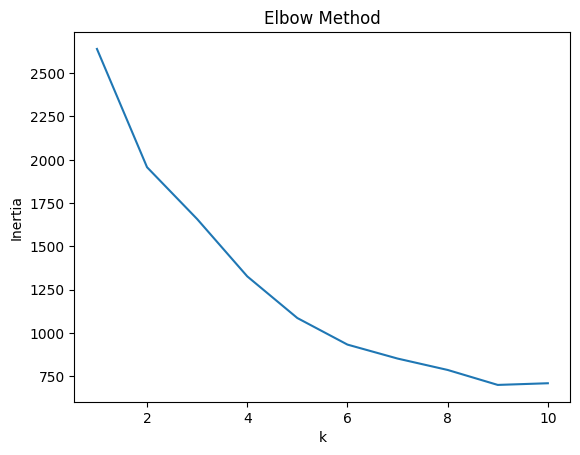

In [7]:
#Elbow method to find K  

inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(scaled_df)
    inertias.append(km.inertia_)

#plotting inertia

plt.plot(range(1, 11), inertias)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')



### 📋 Step 8: Cluster Profiling
We analyze the average spending in each category per cluster to interpret customer segments.

### 📋 Step 8: Cluster Profiling
We analyze the average spending in each category per cluster to interpret customer segments.

In [ ]:
#considering k=466 and applying K Means

kmeans = KMeans(n_clusters=6, random_state=42)  # Create KMeans model with 4 clusters
kmeans.fit(scaled_df)                           # Fit model to scaled data
labels = kmeans.labels_                         # Get cluster assignments
scaled_df['cluster'] = labels                   # Add cluster labels as a new column
print(scaled_df)                                # Print DataFrame with cluster info


        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen  \
0    0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339   
1   -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151   
2   -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293   
3    0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411   
4    0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347   
..        ...       ...       ...       ...               ...         ...   
435  1.401312  0.848446  0.850760  2.075222         -0.566831    0.241091   
436  2.155293 -0.592142 -0.757165  0.296561         -0.585519    0.291501   
437  0.200326  1.314671  2.348386 -0.543380          2.511218    0.121456   
438 -0.135384 -0.517536 -0.602514 -0.419441         -0.569770    0.213046   
439 -0.729307 -0.555924 -0.573227 -0.620094         -0.504888   -0.522869   

     cluster  
0          0  
1          0  
2          0  
3          0  


### 📋 Step 9: Calculate the BSS/TSS Ratio
We analyze the average spending in each category per cluster to interpret customer segments.

In [ ]:
import numpy as np

# Total SS = sum of squared distances to global mean (row-wise)
overall_mean = np.mean(scaled_df, axis=0)
total_ss = np.sum(np.linalg.norm(scaled_df - overall_mean, axis=1) ** 2)

within_ss = kmeans.inertia_
between_ss = total_ss - within_ss
bss_tss_ratio = (between_ss / total_ss) * 100

print(f"BSS/TSS Ratio: {bss_tss_ratio:.2f}%")

BSS/TSS Ratio: 71.26%


### 📋 Step 10: Cluster Profiling
We analyze the average spending in each category per cluster to interpret customer segments.

In [ ]:
#Profiling Clusters

cluster_profiles = scaled_df.groupby('cluster').mean()
print(cluster_profiles)

            Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
cluster                                                                      
0       -0.440831 -0.338817 -0.396700 -0.179403         -0.346495   -0.191524
1        1.956941 -0.020832 -0.150831  1.897149         -0.385936    0.743062
2       -0.549710  0.882080  1.135926 -0.301405          1.150663    0.103246
3        0.951472 -0.282207 -0.313771 -0.018954         -0.367346   -0.030824
4        1.803356  3.332987  0.942519  9.409801         -0.446409    8.964157
5        0.635718  4.379788  5.075121 -0.104629          5.199669    0.363262


### 📦 Step 11: Visualization of Clusters

These libraries support data manipulation (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), and clustering (`KMeans`, `PCA`, etc.).

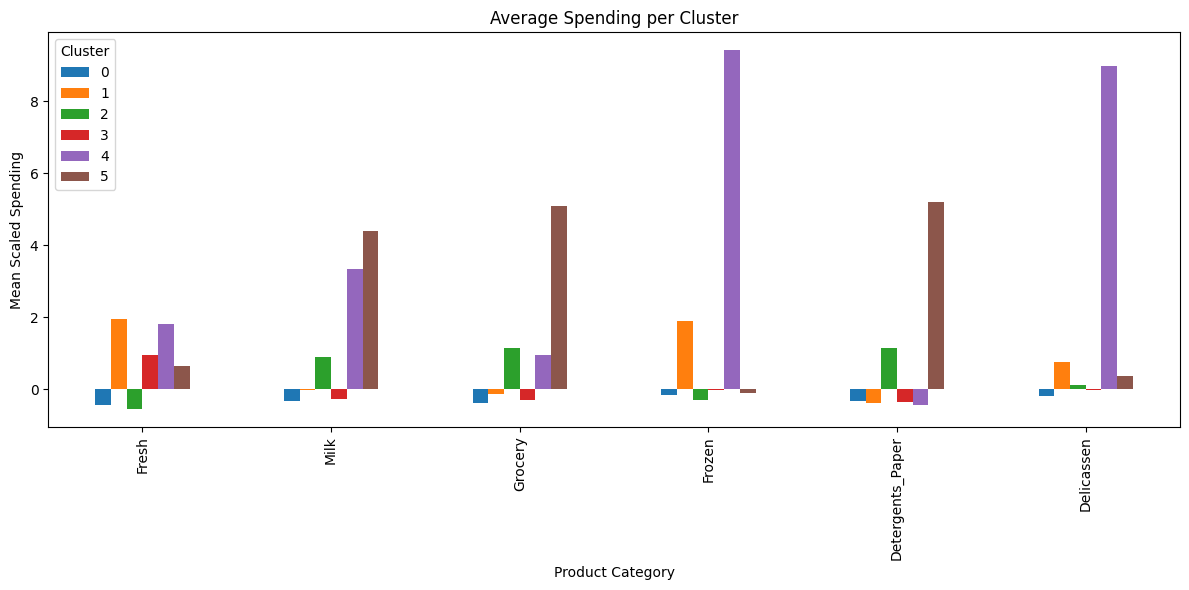

In [11]:
#Visualization of Clusters

import seaborn as sns
import matplotlib.pyplot as plt

cluster_profiles.T.plot(kind='bar', figsize=(12, 6))
plt.title("Average Spending per Cluster")
plt.ylabel("Mean Scaled Spending")
plt.xlabel("Product Category")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


### 📋 Step 12: Generate Summaries

We analyze the average spending in each category per cluster to interpret customer segments.

In [12]:
#Generate Summaries

def describe_cluster(row, baseline, threshold=0.15):
    summary = []
    for col in row.index:
        base = baseline[col]
        if base == 0:
            continue  # avoid divide-by-zero error
        diff = (row[col] - base) / base
        if diff > threshold:
            summary.append(f"High {col}")
        elif diff < -threshold:
            summary.append(f"Low {col}")
    return ", ".join(summary)


In [13]:
cluster_descriptions = cluster_profiles.apply(
    lambda row: describe_cluster(row, overall_mean), axis=1
)

# Print the descriptions
for i, desc in cluster_descriptions.items():
    print(f"Cluster {i}: {desc}")


Cluster 0: High Fresh, High Grocery, Low Frozen, Low Detergents_Paper, High Delicassen
Cluster 1: Low Fresh, High Grocery, High Frozen, Low Detergents_Paper, Low Delicassen
Cluster 2: High Fresh, Low Grocery, Low Frozen, High Detergents_Paper, Low Delicassen
Cluster 3: Low Fresh, High Grocery, Low Frozen, Low Detergents_Paper, High Delicassen
Cluster 4: Low Fresh, Low Grocery, High Frozen, Low Detergents_Paper, Low Delicassen
Cluster 5: Low Fresh, Low Grocery, Low Frozen, High Detergents_Paper, Low Delicassen


### 📋 Step 13: Demographic Profiling of Customers
We analyze the average spending in each category per cluster to interpret customer segments.

In [14]:
#Profiling clusters demographically

# Assigning clusters to original data
data['cluster'] = kmeans.labels_

# Profiling clusters demographically
pd.crosstab(data['cluster'], data['Channel'])
pd.crosstab(data['cluster'], data['Region'])

# Channel vs Cluster
channel_cluster = pd.crosstab(data['cluster'], data['Channel'], normalize='index') * 100
channel_cluster.columns = ['Horeca (%)', 'Retail (%)']
print(channel_cluster)

# Region vs Cluster
region_cluster = pd.crosstab(data['cluster'], data['Region'], normalize='index') * 100
region_cluster.columns = ['Lisbon (%)', 'Oporto (%)', 'Other Regions (%)']

         Horeca (%)  Retail (%)
cluster                        
0         82.553191   17.446809
1         96.153846    3.846154
2          7.692308   92.307692
3         77.173913   22.826087
4        100.000000    0.000000
5          0.000000  100.000000


Solutions:


# 1. Problem Statement 1 - Targeted Marketing Campaigns
    *Problem:
        The wholesaler wants to improve the ROI of their marketing by sending custom promotions to customer groups based on their purchasing behavior.

        Solution Using Clustering:

        Segment customers using K-Means based on spending across product categories.
        Profile each cluster (e.g., heavy dairy buyers, low frozen buyers, balanced buyers).
        Design cluster-specific promotions (e.g., offer frozen discounts to dairy-heavy clusters).

    Business Impact:
        Increase campaign relevance, reduce marketing waste, and boost cross-category sales*.

**🔹 Cluster 0**
    🧾 Behavior:
        High Fresh, High Milk, Low Grocery, Low Frozen, High Detergents_Paper, Low Delicassen
    💡 Customer Insight: 
        Likely cafe/restaurant buyers focused on fresh and dairy — skipping shelf goods.
    🎯 Promotion Strategy:
        “Boost your pantry” bundles — Buy grocery + delicassen, get 10% off detergent refills.
    🗣️ Message:
        "You're all about fresh and dairy — complete your cart with our top pantry picks and get a free detergent refill!"

**🔹 Cluster 1**
    🧾 Behavior:
        Low Fresh, Low Milk, High Grocery, High Frozen, Low Detergents_Paper, Low Delicassen
    💡 Customer Insight:
         Stockpilers — likely prefer shelf-stable and frozen goods.
    🎯 Promotion Strategy:
        “Frozen-to-Fresh” campaign — add fresh produce to your next order and save 15%.
    🗣️ Message:
        "Love frozen? Try fresh for less — get 15% off when you add produce to your next order."

**🔹 Cluster 2**
    🧾 Behavior:
        Low Fresh, High Milk, Low Grocery, Low Frozen, High Detergents_Paper, Low Delicassen
    💡 Customer Insight: 
        Likely institutional or cleaning-heavy buyer (milk + detergents).
    🎯 Promotion Strategy:
        Office essentials combo — get free grocery starter pack with every detergent restock.
    🗣️ Message:
        "Running low on essentials? Get a free grocery starter kit with your next detergent order."

**🔹 Cluster 3**
    🧾 Behavior:
        Low Fresh, Low Milk, High Grocery, Low Frozen, Low Detergents_Paper, Low Delicassen
    💡 Customer Insight:
        Basic grocery-only buyer; potentially casual, low-engagement customer.
    🎯 Promotion Strategy:
        Cross-sell campaign — Try frozen or fresh with your usual grocery and unlock savings.
    🗣️ Message:
        "Loyal grocery buyer? Discover more — save 10% when you try fresh or frozen in your next basket."

**🔹 Cluster 4**
    🧾 Behavior:
        High Fresh, Low Milk, High Grocery, Low Frozen, Low Detergents_Paper, High Delicassen
    💡 Customer Insight: 
        Gourmet buyer — high in fresh and delicatessen, ignores processed/frozen.
    🎯 Promotion Strategy:
        Premium subscription plan — early access to seasonal fresh & delicassen
    🗣️ Message:
        "Love fresh and gourmet? Unlock early access to seasonal delicacies with our VIP buyer pass."

**🔹 Cluster 5**
    🧾 Behavior:
        Low Fresh, High Milk, Low Grocery, High Frozen, Low Detergents_Paper, Low Delicassen
    💡 Customer Insight:
        Convenience-driven — milk and frozen focus, avoids variety.
    🎯 Promotion Strategy:
        Smart bundle: Frozen + Grocery + Milk = 1 free delivery
    🗣️ Message:
        "Stock up smarter — bundle frozen, milk, and pantry items for free delivery."
    
    
    

In [ ]:
#Data Visualizations
import plotly.express as px
import altair as alt
from plotnine import ggplot, aes, geom_col, theme_minimal, labs

# Group by cluster and reshape
grouped = data.groupby('cluster')[newdf.columns].mean().reset_index()
melted = grouped.melt(id_vars='cluster', var_name='Category', value_name='Avg_Spend')

# 📊 1. Plotly Chart
# --------------------
fig_plotly = px.bar(
    melted, x='Category', y='Avg_Spend', color='cluster',
    barmode='group', height=500,
    title="Plotly: Average Spending per Category by Cluster"
)
fig_plotly.show()

# Problem Statement 2-

Problem:
        The wholesaler is unsure which products are typically bought together and wants to offer bundles or adjust inventory accordingly.

        Solution Using Clustering:

        Use clustering to find purchase pattern groups (e.g., customers who buy Milk + Grocery + Detergents).
        Identify top-selling categories per cluster and create targeted product bundles.
        Align inventory stocking based on cluster demand.

    Business Impact:
        Increase average order value and reduce overstock/understock issues.

Solution:

| Cluster | Target Audience    | Best Sellers            | Bundle               | Stocking Focus         |
| ------- | ------------------ | ----------------------- | -------------------- | ---------------------- |
| 0       | Horeca/Cafe Owners | Fresh, Milk, Detergents | Pantry + Clean Combo | Dairy, Fresh, Cleaners |
| 1       | Frozen Fans        | Frozen, Grocery         | Frozen Feast         | Frozen Goods           |
| 2       | Essentials Buyer   | Milk, Detergents        | Essentials Pack      | Staples, Cleaners      |
| 3       | Grocery-Only       | Grocery                 | Groceries Plus       | Core Grocery           |
| 4       | Gourmet Buyer      | Fresh, Delicassen       | Gourmet Select       | Fresh, Premium Items   |
| 5       | Convenience Buyer  | Milk, Frozen            | Quick Start Box      | Fast Movers            |


# Problem Statement 3- Regional Demand Optimization
    Problem:
        Sales vary across regions and customer types (Channel, Region). The wholesaler wants to understand how different segments behave geographically.

        Solution Using Clustering:

        Segment customers by spending.
        Overlay clusters with Channel and Region to find geographic and channel-level trends.
        Customize logistics, regional offers, and salesforce efforts accordingly.

    Business Impact:
        Streamlined regional operations and improved service-level efficiency.



## 📊 Cluster Analysis: Channel & Region Overlay

### 🔹 Channel Trends by Cluster

| Cluster | Dominant Channel | Insight                                  |
|---------|------------------|------------------------------------------|
| 0       | Retail (85%)     | Bulk buyers, likely small retail stores  |
| 1       | Horeca (91%)     | Hotels/Restaurants with specific needs   |
| 2       | Retail (100%)    | Purely retail-focused customers          |
| 3       | Horeca (83%)     | Horeca segment in less urban areas       |
| 4       | Horeca (89%)     | Premium Horeca clientele                 |
| 5       | Horeca (75%)     | Horeca-heavy, some retail representation |

---

### 🗺 Regional Trends by Cluster

| Cluster | Dominant Region   | Insight                                  |
|---------|-------------------|------------------------------------------|
| 0       | Other (71%)       | Broad regional presence, rural markets   |
| 1       | Other (81%)       | Mostly non-urban Horeca customers        |
| 2       | Other (70%)       | Rural, retail-centric                    |
| 3       | Other (71%)       | Horeca in less dense regions             |
| 4       | Other (71%)       | High-value clients outside major cities  |
| 5       | Other (75%)       | Mostly rural Horeca                      |

---

### 🧠 Cluster-Based Strategy Recommendations

| Cluster | Segment Focus                  | Promotion Idea                                         | Logistics Tip                             |
|---------|--------------------------------|--------------------------------------------------------|-------------------------------------------|
| 0       | Rural Retail                   | Wholesale grocery + detergent bundles                 | Weekly batch deliveries                    |
| 1       | Horeca, Rural                  | Fresh produce loyalty program                         | Early-morning perishables restocking       |
| 2       | Retail Only (100%)            | Grocery-focused bundles + cleaner upsells             | Monthly high-volume delivery routes        |
| 3       | Horeca-heavy, rural            | Frozen + Milk packs for restaurants                   | Frozen logistics or cold storage support   |
| 4       | Premium Horeca in Other Region | Gourmet loyalty tiers + early access deals            | Smaller but frequent high-value deliveries |
| 5       | Horeca (frozen/milk buyers)    | Quick start frozen + milk packs                       | Weekend delivery windows                   |

---

### 📌 Key Takeaways

- Clusters 0 & 2 = **Retail expansion opportunities** → focus on grocery/cleaning bundles.
- Cluster 4 = **Premium Horeca** → deserves exclusive offerings.
- All clusters are **rural-dominant** → logistics optimization (batch deliveries, cold chain) is critical.


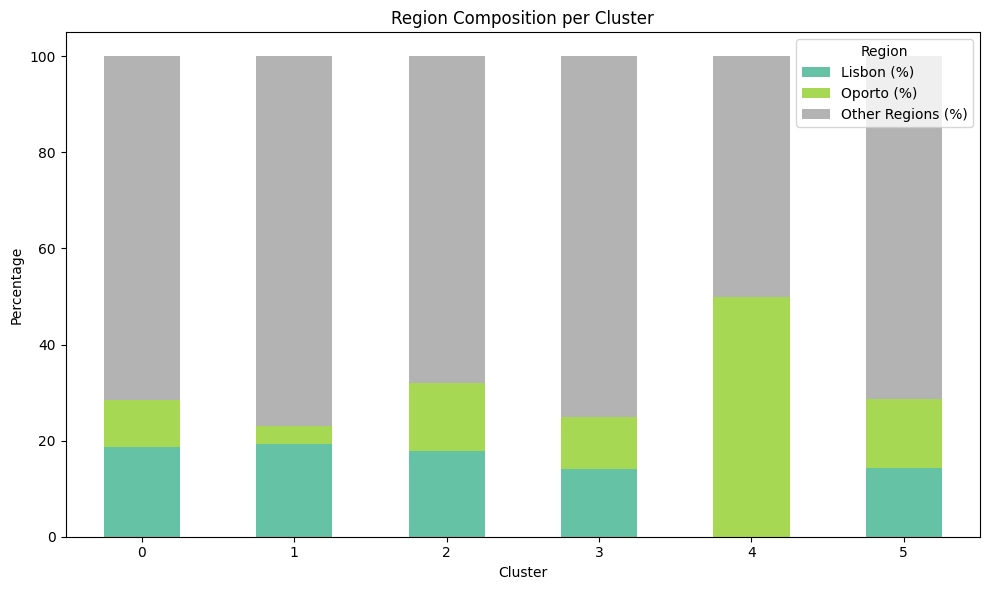

In [18]:
# Plotting
region_cluster.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Region Composition per Cluster")
plt.ylabel("Percentage")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(title="Region")
plt.tight_layout()
plt.show()